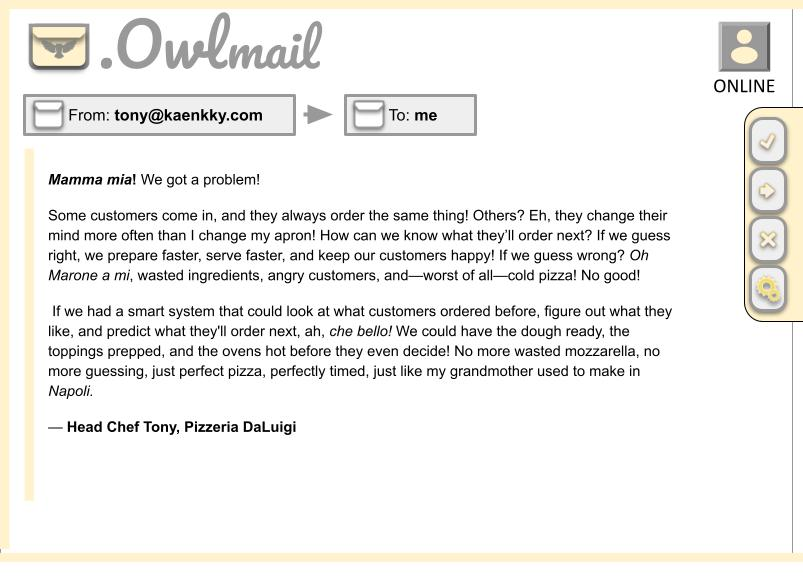

---
*Mamma mia! We got a problem!
Some customers come in, and they always order the same thing! Others? Eh, they change their mind more often than I change my apron! How can we know what they’ll order next? If we guess right, we prepare faster, serve faster, and keep our customers happy! If we guess wrong? Oh Marone a mi, wasted ingredients, angry customers, and—worst of all—cold pizza! No good!*

*If we had a smart system that could look at what customers ordered before, figure out what they like, and predict what they'll order next, ah, che bello! We could have the dough ready, the toppings prepped, and the ovens hot before they even decide! No more wasted mozzarella, no more guessing, just perfect pizza, perfectly timed, just like my grandmother used to make in Napoli.*
</br>
</br>
Head Chef Tony, Pizzeria DaLuigi


---

Chef Tony has asked you for help. Don't worry about it, chef. We got this, with a little help from artificial intelligence.

#Goals of this Project

In this workbook, you’ll build a Markov Chain model to predict each customer’s next pizza, so you can serve them faster and avoid cold pizza!"

1. We learn from each customer’s order history.
2. We predict the next pizza based on their last order.
3. We track how often each pizza leads to another.

Let’s say Yukari orders:
* Pepperoni → Margherita → Pepperoni → Mozzarella

The Markov model AI, we'll see that:

* Pepperoni is followed by Margherita 50% of the time, and Mozzarella 50% of the time.
* Margherita is always followed by Pepperoni.
* Mozzarella has no history yet, so we pick randomly.

Now, if Yukari’s last order was Pepperoni, we predict either Margherita or Mozzarella—whichever is more common.



# Step 1. Importing dependencies

Before we can start cooking, we need to import some **dependencies** You can think of it like this: you as a **programmer** are the **chef** and the **dependencies** are you **tools and ingredients.**</br>

 Even the best programmers use some ready-made tools: after all, the Sushi master doesn't catch his own salmon and chef Tony doesn't milk the cow himself for the mozzarella.

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


#Step 2: Seeing Our Data

First, we need to know what's on the menu and to know what the customers have ordered before.

Chef Tony has shared a list of pizzas on the menu and each customer’s order history.

In [168]:
pizza_menu = [
    "Margherita", "Pepperoni", "Mozzarella", "Prosciutto", "Hawaiian", "Triple Pineapple", "Mayonnaise Pizza"
]

customer_orders = {
    "Ryuji": ["Triple Pineapple", "Triple Pineapple", "Triple Pineapple", "Hawaiian", "Triple Pineapple"],
    "Ann": ["Margherita", "Margherita", "Prosciutto", "Margherita", "Margherita"],
    "Matias": ["Prosciutto", "Mayonnaise Pizza", "Pepperoni", "Hawaiian", "Mozzarella"],
    "Arama": ["Hawaiian", "Hawaiian", "Pepperoni", "Margherita", "Mayonnaise Pizza"],
    "Jairo": ["Mozzarella", "Mozzarella", "Hawaiian", "Margherita", "Mozzarella"],
    "Yukari": ["Pepperoni", "Margherita", "Mozzarella", "Prosciutto", "Hawaiian"],
    "Makoto": ["Prosciutto", "Pepperoni", "Triple Pineapple", "Margherita", "Pepperoni"],
    "Mitsuru": ["Margherita", "Triple Pineapple", "Mozzarella", "Pepperoni", "Margherita"],
    "Jesse": ["Triple Pineapple", "Triple Pineapple", "Triple Pineapple", "Triple Pineapple", "Triple Pineapple"],
    "Sophia": ["Margherita", "Hawaiian", "Mozzarella", "Pepperoni", "Margherita", "Prosciutto"],
    "Takashi": ["Mozzarella", "Mayonnaise Pizza", "Margherita", "Prosciutto", "Pepperoni", "Hawaiian"],
    "Olivia": ["Pepperoni", "Pepperoni", "Hawaiian", "Hawaiian", "Margherita", "Mozzarella"],
    "Elena": ["Margherita", "Mozzarella", "Prosciutto", "Pepperoni", "Mozzarella", "Hawaiian"],
    "Felix": ["Prosciutto", "Hawaiian", "Margherita", "Triple Pineapple", "Mozzarella", "Prosciutto"],
    "Damian": ["Triple Pineapple", "Margherita", "Pepperoni", "Mozzarella", "Hawaiian", "Pepperoni"],
    "Haruto": ["Hawaiian", "Triple Pineapple", "Mozzarella", "Margherita", "Prosciutto", "Mayonnaise Pizza"],
    "Isla": ["Pepperoni", "Hawaiian", "Mozzarella", "Prosciutto", "Triple Pineapple", "Margherita"],
    "Luca": ["Prosciutto", "Prosciutto", "Mayonnaise Pizza", "Mozzarella", "Hawaiian", "Margherita"],
    "Eve": ["Mozzarella", "Hawaiian", "Pepperoni", "Triple Pineapple", "Prosciutto", "Mozzarella"],
    "Kai": ["Margherita", "Prosciutto", "Mozzarella", "Margherita", "Pepperoni", "Triple Pineapple"],
    "Noa": ["Hawaiian", "Margherita", "Mayonnaise Pizza", "Mozzarella", "Prosciutto", "Pepperoni"]
}

## **📝 Task 1**:
Look at each customer and their past orders and discuss with your team. Do you notice any clear patterns?
* Who orders the same pizza a lot?
* Who changes their mind frequently?
Discuss with your team: Which customers seem easiest to predict?



## **📝 Task 2**:

Add your own data to make the orders more diverse! For example:

You can add new customers with the following syntax:

* Create a new customer named "Takumi" with at least four orders (add your own customers below):



In [169]:
customer_orders["Takumi"] = ["Pepperoni", "Hawaiian", "Pepperoni", "Mozzarella"]




Ensure you only use pizzas from the existing pizza_menu:

```
pizza_menu = [
    "Margherita", "Pepperoni", "Mozzarella", "Prosciutto", "Hawaiian", "Triple Pineapple", "Mayonnaise Pizza"
]
```



Example:

customer_orders["Takumi"] = ["Pepperoni", "Hawaiian", "Pepperoni", "Mozzarella"]

* After you add more orders or new customers, **re-run** the code in the following steps to see if the AI handles your new data well.


# Step 3: Visualizing our Pizza Data
Let’s see which pizza is most popular overall.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127829 (\N{SLICE OF PIZZA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


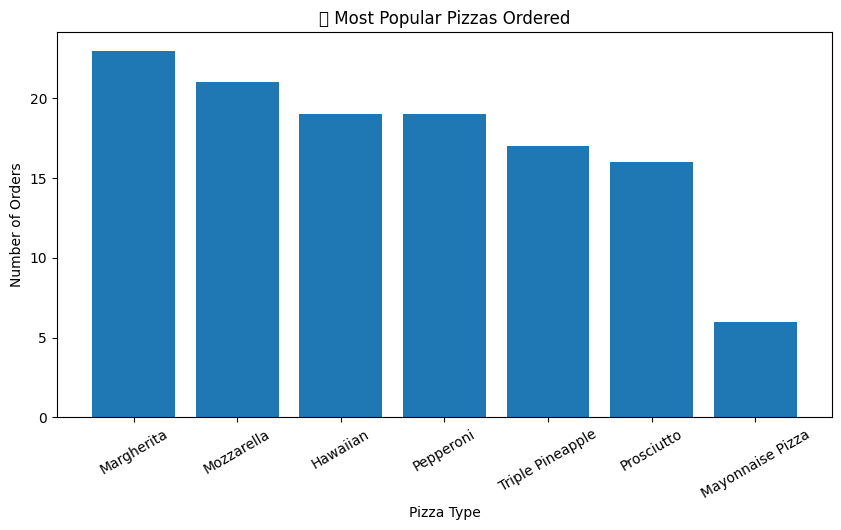

In [170]:
# Count how many times each pizza was ordered
pizza_counts = {}
for orders in customer_orders.values():
    for pizza in orders:
        pizza_counts[pizza] = pizza_counts.get(pizza, 0) + 1

# Sort pizzas by popularity
sorted_pizzas = sorted(pizza_counts.items(), key=lambda x: x[1], reverse=True)

# Extract names and counts for plotting
pizza_names, order_counts = zip(*sorted_pizzas)

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(pizza_names, order_counts)
plt.xlabel("Pizza Type")
plt.ylabel("Number of Orders")
plt.title("🍕 Most Popular Pizzas Ordered")
plt.xticks(rotation=30)
plt.show()


## **📝 Task 3**:
Discuss:
* Which pizzas do you think our AI mightguess more often if it’s not sure?

# Step 4: Building the AI Model

As goal is to teach the AI to recognize patterns in customer orders and predict what they will order next, we will train the AI using the **Markov Chain** model.

----

1. We count how often each pizza is followed by another pizza.
2. For example, if a customer’s last order was Pepperoni, we check what they ordered next in the past and use that to predict the future.

In [171]:
def build_transition_matrix(orders):
    matrix = defaultdict(lambda: defaultdict(int))
    for i in range(len(orders) - 1):
        current_pizza = orders[i]
        next_pizza = orders[i + 1]
        matrix[current_pizza][next_pizza] += 1

    # Convert counts to probabilities
    for current_pizza, transitions in matrix.items():
        total = sum(transitions.values())
        for next_pizza in transitions:
            transitions[next_pizza] /= total

    return matrix

# Train a Markov Chain for each customer
customer_markov_models = {
    customer: build_transition_matrix(orders)
    for customer, orders in customer_orders.items()
}
print("✔️ AI Model Training Completed")

✔️ AI Model Training Completed


Now each customer’s **chain** knows the probability of going from any pizza they’ve tried to each subsequent pizza.”


💡 We'll also need to define a function that predicts the next order of an individual customer.



In [172]:
def predict_next_order(customer, last_order):
    if customer not in customer_markov_models:
        return np.random.choice(pizza_menu)  # Fallback if customer not found

    transitions = customer_markov_models[customer].get(last_order, {})
    if not transitions:
        return np.random.choice(pizza_menu)  # Fallback if no transitions recorded

    return max(transitions, key=transitions.get)  # Pick the most likely next order


# Step 5. Predicting the next pizza

We got our AI model trained. Now let’s see if our model can predict the customer orders correctly.
* This function will look at the last pizza a customer had, and use the Markov Chain to guess the next one.


In [173]:
def predict_next_order(customer, last_pizza):
    if customer not in customer_markov_models:
        # If we don't know the customer, do this
        return np.random.choice(pizza_menu)

    transitions = customer_markov_models[customer].get(last_pizza, {})
    if not transitions:
        # If the pizza has no transitions, do this
        return np.random.choice(pizza_menu)

    # Pick the pizza with the highest probability
    return max(transitions, key=transitions.get)


## **📝 Task 4** *italicized text*:
Look at the code above and discuss.

1. What happens if the model has not been trained on the customer?
2. What happens if there are no known transitions when making a prediction?
  * this means that the user's latest pizza is the first time they have ordered that particular pizza


# Step 6. Testing the AI on Known Customers

Let’s see how well our AI predicts the actual next order from history.

In [174]:
rows = []

for customer, orders in customer_orders.items():
    # We need at least 2 orders for a 'latest' prediction
    if len(orders) < 2:
        continue

    # Latest prediction: second-last → last
    previous_pizza = orders[-2]
    predicted_next = predict_next_order(customer, previous_pizza)
    actual_next = orders[-1]

    rows.append([
        customer,
        previous_pizza,
        predicted_next,
        actual_next
    ])

df_final_transition = pd.DataFrame(rows, columns=[
    "Customer", "Previous Pizza", "AI Prediction", "Actual Next Pizza"
])

df_final_transition

,Customer,Previous Pizza,AI Prediction,Actual Next Pizza
0,Ryuji,Hawaiian,Triple Pineapple,Triple Pineapple
1,Ann,Margherita,Margherita,Margherita
2,Matias,Hawaiian,Mozzarella,Mozzarella
3,Arama,Margherita,Mayonnaise Pizza,Mayonnaise Pizza
4,Jairo,Margherita,Mozzarella,Mozzarella
5,Yukari,Prosciutto,Hawaiian,Hawaiian
6,Makoto,Margherita,Pepperoni,Pepperoni
7,Mitsuru,Pepperoni,Margherita,Margherita
8,Jesse,Triple Pineapple,Triple Pineapple,Triple Pineapple
9,Sophia,Margherita,Hawaiian,Prosciutto


**Task 5:**
Discuss with your team:
* How accurately does the AI seem to be predicting the pizzas?

# Evaluating Model Accuracy %

Instead of guesswork, let's get accurate numbers of the AI's accuracy.

We’ve created a DataFrame `df_final_transition` that shows:

- **Customer**: The person whose order we’re predicting.  
- **Previous Pizza**: The customer’s second-last pizza.  
- **AI Prediction**: Our model’s guess for their last pizza.  
- **Actual Next Pizza**: The actual pizza they ordered last.

Let’s measure how often the AI guessed correctly for these final transitions:

In [175]:
correct_count = (df_final_transition["AI Prediction"] == df_final_transition["Actual Next Pizza"]).sum()
total_count = len(df_final_transition)
accuracy = 100.0 * correct_count / total_count

print(f"Final-Step Prediction Accuracy: {accuracy:.2f}%")

Final-Step Prediction Accuracy: 86.36%



* High accuracy (>70%)
* Low accuracy (70%>)

## **📝 Task 5** *italicized text*:
Consider this exercise as a whole and discuss

1. How accurate is the AI?
2. What type of customer is the AI best at predicting?
3. What type of customer is the AI worst at predicting?
4. What do you think needs to be done to improve the model's accuracy?